# Эксперименталная проверка уравнений Эйнштейна для фотоэффекта и определение постоянной планка.

## Необходимые теоретические сведения.
Целью данной работы не является подробное описание теоретических предпосылок. По ходу изложения будут приведены как хорошо известные формулы, так и относящиеся к более узкому классу задач. С их выводом читатель, при желании, может ознакомиться отдельно.

Испускание электронов фотокатодом при облучении светом называют фотоэффектом.
Это явление хорошо объясняется фотонной теорией света. При столкновении фотона 
с электроном фотокатода его энергия передается электрону. Этот процесс можно описать формулой Энштейна для фотоэффекта.

\begin{equation} 
 \hslash \omega = E_{max} + W
\end{equation}

Где $E_{max}$ - это максимальная кинетическая энергия электрона после выхода.
$W$ - работа выхода электрона с фотокатода.
Реально энергетический спектр вылетевших электронов непрерывен $(0,E_{max}$), потому как пластинка фотокатода имеет некоторую конечную ширину.

## Часть 1. Градуировка барабана монохроматора.
Далее привожу график зависимости длины волны (нм) от (%), где % - условное обозначение шкалы монохроматора. Значения определяю по известным спектралным линиям неона.

a = 0.19  +- 0.02
b =  96.7 +- 21.2


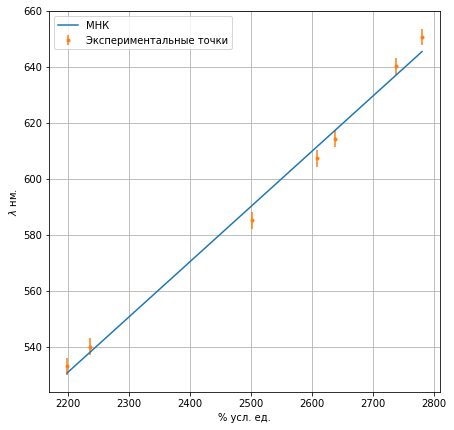

In [4]:

#Проведение эксперимента:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from math import* 
import warnings
warnings.filterwarnings('ignore')

def myFunction(x, a, b): 
     return a*x+b

# Парсинг данных.
data = pd.read_table('kalibr', sep = '\s+' )
mLambda = data['lambda']*0.1
mPercent = data['deg']
yErr = [3]*7

# Мнк
xlist = mlab.frange (mPercent[0], mPercent[len(mPercent)-1], 0.005)
result = curve_fit(f = myFunction, xdata= mPercent, ydata= mLambda, sigma = yErr,absolute_sigma = True )
popt, pcov = result

#Визуализация.
plt.figure(figsize= (7,7)) 
plt.plot(xlist, myFunction(xlist, *popt), label='МНК')
plt.errorbar(mPercent,mLambda,yerr = yErr, fmt='.', label='Экспериментальные точки') 
plt.xlabel("% усл. ед.")
plt.ylabel("$\lambda$ нм.")
plt.grid()
plt.legend();
a,b = popt
print('a = 0.19 ','+- 0.02')
print('b = ', b.round(1),'+- 21.2')



## Часть 2. Исследование зависимости фототока от величины тормозящего потенциала.

На самом деле мы исследуем зависимость от тормозящего напряжения некой величины $\sim I$ (В).
Но абсолютные значения тока нам и не требуются. 
Вблизи значения запирающего напряжения $\sqrt{I}$ линейно зависит от напряжения.
Нулевое значение величины $\sim I$ - 0.026 В.

Нулевое значение корня из "I" = 0.161 В.
629 нм : a,b [0.048 0.14 ] V зап = 0.43 +- 0.03 В 
610 нм : a,b [0.065 0.144] V зап = 0.26 +- 0.02 В 
591 нм : a,b [0.067 0.144] V зап = 0.25 +- 0.02 В 
572 нм : a,b [0.063 0.149] V зап = 0.19 +- 0.02 В 
553 нм : a,b [0.075 0.143] V зап = 0.24 +- 0.02 В 


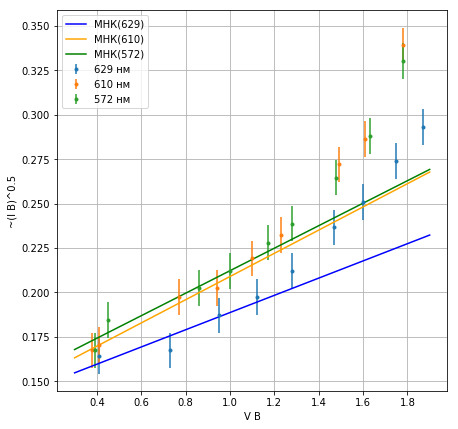

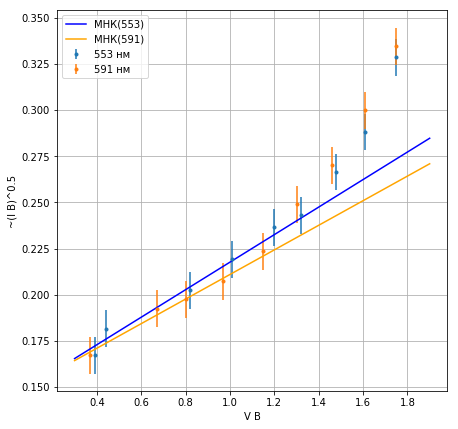

In [5]:
def myFunction(x, a, b): 
     return a*x+b

# парсинг данных
data = pd.read_table('myData1', sep = '\s+' )
x1 = data['x1'] # % 2800 (629 нм)
y1 = data['y1']**0.5
y1Err = [0.01]*len(y1)
x2 = data['x2'] # % 2700 (610 нм)
y2 = data['y2']**0.5
y2Err = [0.01]*len(y2)
x3 = data['x3'] # % 2600 (591)
y3 = data['y3']**0.5
y3Err = [0.01]*len(y3)
x4 = data['x4'] # % 2500 (572 нм)
y4 = data['y4']**0.5
y4Err = [0.01]*len(y4)
x5 = data['x5'] # % 2400 (553 нм)
y5 = data['y5']**0.5
y5Err = [0.01]*len(y5)

#МНК прямую будем проводить от значения V зап. в диап. 1.2 - 1.3 В.

#Линейное приближение.
xlist = mlab.frange (0.3, 1.9, 0.005)

result1 = curve_fit(f = myFunction, xdata= x1[5:], ydata= y1[5:], sigma = y1Err[5:],absolute_sigma = True )
popt1, pcov = result1
result2 = curve_fit(f = myFunction, xdata= x2[5:], ydata= y2[5:], sigma = y2Err[5:],absolute_sigma = True )
popt2, pcov = result2
result3 = curve_fit(f = myFunction, xdata= x3[5:], ydata= y3[5:], sigma = y3Err[5:],absolute_sigma = True )
popt3, pcov = result3
result4 = curve_fit(f = myFunction, xdata= x4[5:], ydata= y4[5:], sigma = y4Err[5:],absolute_sigma = True )
popt4, pcov = result4
result5 = curve_fit(f = myFunction, xdata= x5[5:], ydata= y5[5:], sigma = y5Err[5:],absolute_sigma = True )
popt5, pcov = result5


#визуалтзация часть1.
plt.figure(figsize= (7,7)) 
plt.errorbar(x1,y1,yerr = y1Err,fmt = '.',label = '629 нм') 
plt.errorbar(x2,y2,yerr = y2Err,fmt = '.',label = '610 нм') 
plt.errorbar(x4,y4,yerr = y4Err,fmt = '.',label = '572 нм') 
plt.plot(xlist, myFunction(xlist, *popt1), label='МНК(629)',color = 'blue')
plt.plot(xlist, myFunction(xlist, *popt2), label='МНК(610)',color = 'orange')
plt.plot(xlist, myFunction(xlist, *popt4), label='МНК(572)',color = 'green')
plt.xlabel("V В")
plt.ylabel("~(I В)^0.5")
plt.grid()
plt.legend();

#Визуализация часть2.
plt.figure(figsize= (7,7)) 
plt.errorbar(x5,y5,yerr = y5Err,fmt = '.',label = '553 нм') 
plt.errorbar(x3,y3,yerr = y3Err,fmt = '.',label = '591 нм') 
plt.plot(xlist, myFunction(xlist, *popt5), label='МНК(553)',color = 'blue')
plt.plot(xlist, myFunction(xlist, *popt3), label='МНК(591)',color = 'orange')
plt.xlabel("V В")
plt.ylabel("~(I В)^0.5")
plt.grid()
plt.legend();

#Вывод результатов.
print('Нулевое значение корня из "I" = 0.161 В.')
print('629 нм : a,b',popt1.round(3),'V зап = 0.43 +- 0.03 В ')
print('610 нм : a,b',popt2.round(3),'V зап = 0.26 +- 0.02 В ')
print('591 нм : a,b',popt3.round(3),'V зап = 0.25 +- 0.02 В ')
print('572 нм : a,b',popt4.round(3),'V зап = 0.19 +- 0.02 В ')
print('553 нм : a,b',popt5.round(3),'V зап = 0.24 +- 0.02 В ')

## Часть 3. Определение постоянной Планка.

Теперь, когда нам известна зависимость $V_o(\omega)$, мы можем найти значение постоянной планка, как наклон графика этой линйной зависимости

\begin{equation} 
 \frac{dV_0}{d\omega} =  \hslash/e
\end{equation}

где e - заряд электрона.

[-0.40490195  2.29686271]
Полученное значение постоянной Планка 6.4 * 10^-34 +- 1.6 * 10^-34 Дж*с.


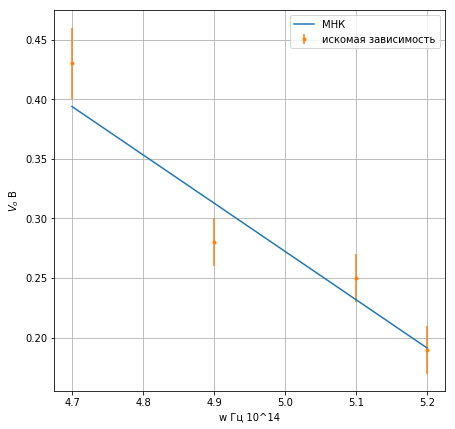

In [3]:
data = pd.read_table('plank', sep = '\s+' )
v = data['V']
w = data['w']
yErr = [0.03]+3*[0.02]

def myFunction(x, a, b): 
     return a*x+b

# Мнк
xlist = mlab.frange (4.7, 5.2, 0.005)
result = curve_fit(f = myFunction, xdata= w, ydata= v, sigma = yErr,absolute_sigma = True )
popt, pcov = result

#Визуализация.
plt.figure(figsize= (7,7)) 
plt.plot(xlist, myFunction(xlist, *popt), label='МНК')
plt.errorbar(w,v,yerr = yErr, fmt='.', label='искомая зависимость') 
plt.xlabel("w Гц 10^14")
plt.ylabel("$V_o$ В")
plt.grid()
plt.legend();
print(popt)
print('Полученное значение постоянной Планка 6.4 * 10^-34 +- 1.6 * 10^-34 Дж*с.')

## Вывод.
В ходе работы была проверена формула Эйнштейна для фотоэффекта. Было экспериментально получено
значение постоянной планка $6.4 \cdot 10^{-34} \pm 1.6\cdot 10^{-34}$ Дж с.
Когда табличное значение $6.6\cdot 10^{-34}$ Дж с.